
<a id='chap-tpdbscan'></a>

# DBSCAN
- Yao: 002-28-5196
- Dec 11, 2022


### Question 1:

(500, 2)


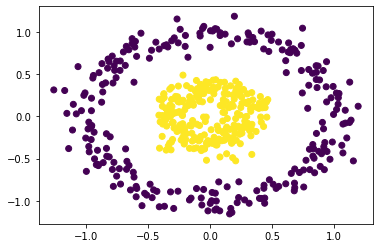

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.utils import shuffle

# Let's generate a scatter plot composed of two circles
# The cloud contains 500 observations (`n_samples`) noisy by
# a Gaussian noise of standard deviation 0.1 (`noise`).
# The ratio between the radius of the small circle and the large circle
# is 0.3 (`factor`).
data, labels = sklearn.datasets.make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=0)

print(data.shape)
# Random permutation of the rows of the matrix (the observations are mixed)
data, labels = shuffle(data, labels)

# Point cloud display
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

### Question 2:

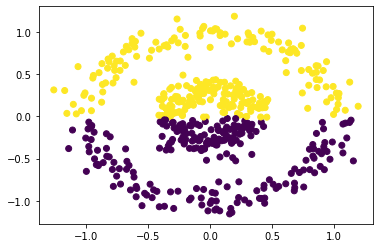

In [10]:
# Question 2
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.utils import shuffle
# generate the dataset
data, labels = sklearn.datasets.make_circles(n_samples=500, noise=0.1, factor=0.3, random_state=0)
# Random permutation of the rows of the matrix (the observations are mixed)
data, labels = shuffle(data, labels)

# using kMeans to classify the data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0,init='k-means++').fit(data)
labels = kmeans.labels_
# plot the image
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()


### Question 3 & 4:

In [36]:
from sklearn.cluster import DBSCAN

db = DBSCAN()
# db = DBSCAN(eps=0.21)

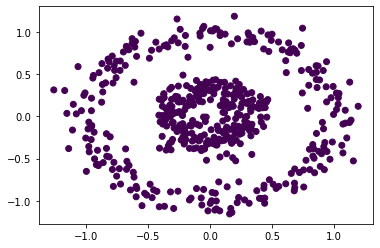

In [37]:
predictions = db.fit_predict(data)
# equivalent to
# db.fit(data)
# predictions = db.labels_

# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

### Qustion 5:

In [44]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=4).fit(data)
distances, _ = nn.kneighbors(data)

In [43]:
print(distances.shape)
print(distances)

(500, 4)
[[0.         0.04809514 0.0653732  0.0861943 ]
 [0.         0.0175769  0.03390971 0.03782292]
 [0.         0.03366237 0.07399293 0.09463227]
 ...
 [0.         0.07778193 0.0838797  0.10100307]
 [0.         0.05370197 0.08659094 0.08833146]
 [0.         0.00965661 0.0413765  0.04736844]]


In [45]:
print(_.shape)
print(_)

(500, 4)
[[  0 211 328 335]
 [  1 347 224 134]
 [  2 338  96 361]
 ...
 [497 443  75 149]
 [498 187 340 221]
 [499 431  86 158]]


In [52]:
a = np.sort(distances[:,-1])
print(a.shape)
print(a[::-1].shape)

(500,)
(500,)


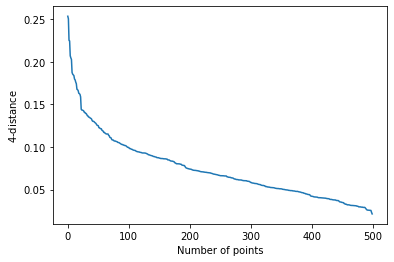

In [63]:
# get the fourth element of each point 
distances_triees = np.sort(distances[:,-1])[::-1]
plt.plot(distances_triees)
plt.xlabel("Number of points")
plt.ylabel("$4$-distance")
plt.show()

### Question 6

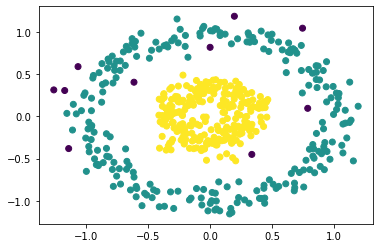

In [65]:
# in the above cruve, we can see that most of the 4th points
# are under 0.15 and the maximun is 0.25
from sklearn.cluster import DBSCAN
# set the min_samples = 4 and eps=0.15
db = DBSCAN(eps=0.15, min_samples=4)
# db = DBSCAN(eps=0.25, min_samples=4)
# fit and predict
predictions = db.fit_predict(data)
# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()


### Question 7:

In [67]:
distances[:,-1][predictions == -1]

array([0.17617733, 0.25349463, 0.20459095, 0.25047591, 0.18552116,
       0.15885283, 0.2251783 , 0.18382363, 0.16621258, 0.17979533])

### Question 8:

In [73]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [74]:
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))

### Question 9:

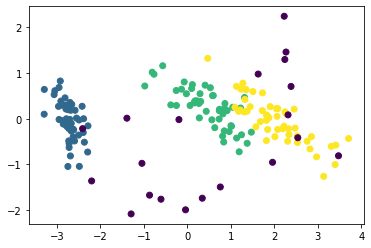

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

### Question 10:

In [103]:
# automatic DBSCAN
# import the data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))
# using automatic DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN()
predictions = db.fit_predict(X)

/var/folders/19/5g8f2mf56996b4r2sd_vdqh80000gn/T/ipykernel_7832/1831929778.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

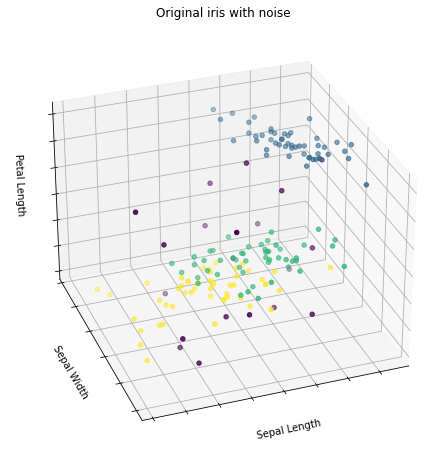

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title("Original iris with noise")
ax.set_xlabel("Sepal Length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length")
ax.w_zaxis.set_ticklabels([])

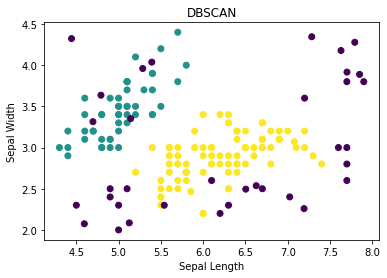

In [107]:
plt.scatter(X[:, 0], X[:, 1], c=predictions)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("DBSCAN")
plt.show()

/var/folders/19/5g8f2mf56996b4r2sd_vdqh80000gn/T/ipykernel_7832/464651871.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

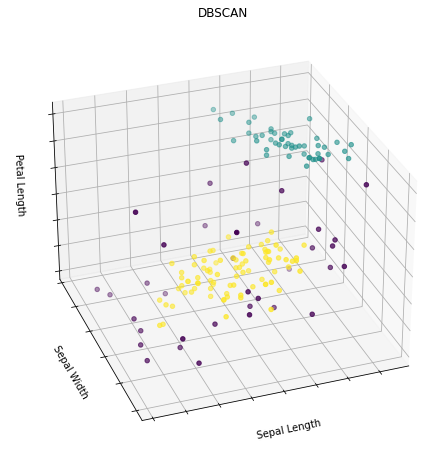

In [98]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=predictions)
ax.set_title("DBSCAN")
ax.set_xlabel("Sepal Length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length")
ax.w_zaxis.set_ticklabels([])

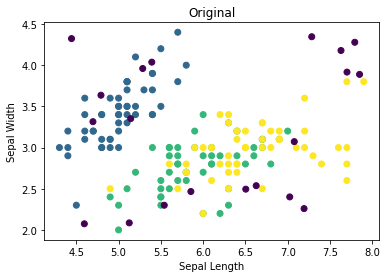

In [108]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Original")
plt.show()

In [100]:
# DBSCAN with parameters
# import the data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))
# using automatic DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN()
predictions = db.fit_predict(X)
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [101]:
# import the data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, 4 * np.ones(20, dtype=int)))
# uisng KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 3, 3, 2,
       3, 0, 0, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 0, 1, 0], dtype=int32)

/var/folders/19/5g8f2mf56996b4r2sd_vdqh80000gn/T/ipykernel_7832/2803673457.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

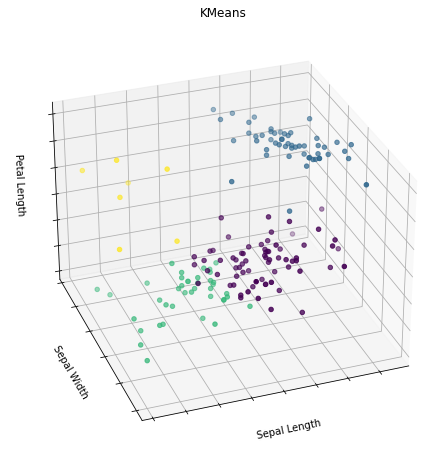

In [102]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.set_title("KMeans")
ax.set_xlabel("Sepal Length")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length")
ax.w_zaxis.set_ticklabels([])

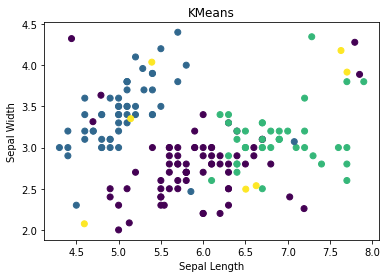

In [109]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("KMeans")
plt.show()

### Question 11:

The DBSCAN prediction

In [110]:
# DBSCAN with parameters
# import the data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))
# using automatic DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN()
predictions = db.fit_predict(X)
predictions

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1])

The real labels

In [111]:
# DBSCAN with parameters
# import the data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

First, we need to define what is good detection rate of outliers.
I believe the good detection rate is combine with two part:
- 1.What percentage of outliers can estimator detect?
- 2.What percentage of non-noise data does the estimator detect as outliers?
- For the first part: the fomular should be a = (number of correct outliers estimator detect)/(total number of outliers)
- For the second part, the fomular should be b = (number of incorrect ouliers estimator detect)/(total number of non-outliers)
The higher the a, higher the good detection rate of outliers. Higher the b, the lower the good dection rate of outliers.

In [125]:
from sklearn.metrics import accuracy_score
# calculate the a 
a = accuracy_score(predictions[150:170],y[150:170])
print("a = " + str(a))
b = (predictions[0:150] == -1).sum() / 150
print("b = ", str(b))

a = 0.85
b =  0.11333333333333333


In [121]:
b = predictions[0:150]
b

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [124]:
c = y[0:150]
c

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])